In [1]:
import numpy as np
import matplotlib.pyplot as plt

Сгенерируем данные

In [2]:
np.random.seed(42)
n = 100  #количество точек
x = 2 * np.random.rand(n, 1)  #независимая переменная (один фактор)
y_true = 4 + 3 * x  #истинная зависимость (y = 4 + 3x)
y = y_true + np.random.randn(n, 1)  #добавляем шум к зависимой переменной

In [3]:
#функция потерь
def compute_loss(w0, w1, x, y):
    predictions = w1 * x + w0
    return np.mean((y - predictions) ** 2) / 2

#вычисляем градиент функции потерь
def compute_gradient(w0, w1, x, y):
    n = len(y)
    predictions = w1 * x + w0 
    dw0 = -np.mean(y - predictions)  
    dw1 = -np.mean((y - predictions) * x) 
    return np.array([dw0, dw1])

#градиентный спуск
def gradient_descent(x, y, learning_rate=0.1,  ε=1e-6, max_iter=1000):
    w0, w1 = 0.0, 0.0  #начальные значения параметров
    losses = [] 
    for iteration in range(max_iter):
        gradient = compute_gradient(w0, w1, x, y)
        w0 -= learning_rate * gradient[0]  #перезапишем w0
        w1 -= learning_rate * gradient[1]  #перезапишем w1
        
        #вычисляем и сохраняем текущую потерю
        loss = compute_loss(w0, w1, x, y)
        losses.append(loss)
        
        #проверяем условие остановки
        if np.linalg.norm(gradient) <  ε:
            break
    
    return w0, w1, losses

In [4]:
#запуск градиентного спуска
learning_rate = 0.1
w0, w1, losses = gradient_descent(x, y, learning_rate)

print(f"Найденные параметры: w0 = {w0:.4f}, w1 = {w1:.4f}")

Найденные параметры: w0 = 4.2151, w1 = 2.7701


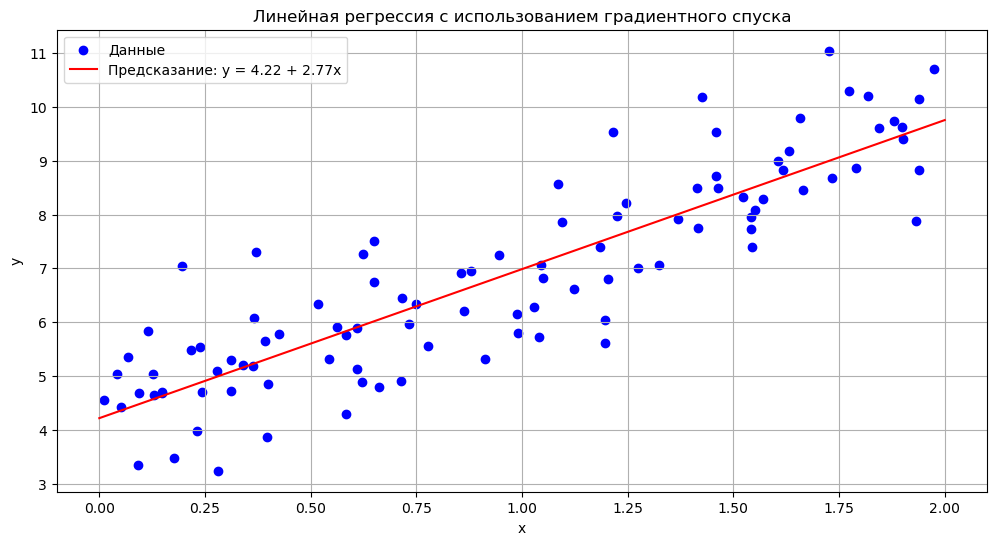

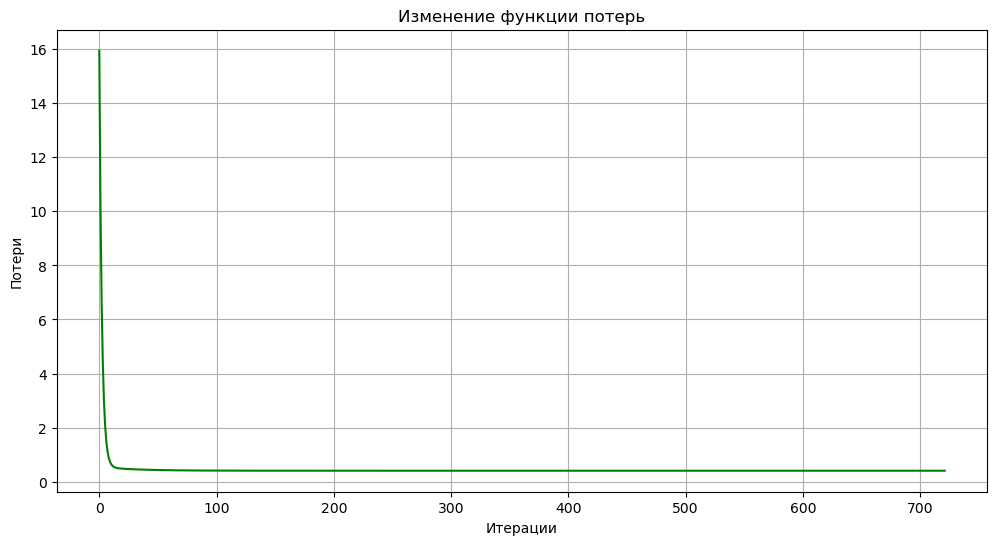

In [6]:
plt.figure(figsize=(12, 6))

plt.scatter(x, y, color="blue", label="Данные")

#предсказанная прямая
x_line = np.linspace(0, 2, 100).reshape(-1, 1)
y_line = w1 * x_line + w0
plt.plot(x_line, y_line, color="red", label=f"Предсказание: y = {w0:.2f} + {w1:.2f}x")

plt.title("Линейная регрессия с использованием градиентного спуска")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

#график изменения функции потерь
plt.figure(figsize=(12, 6))
plt.plot(range(len(losses)), losses, color="green")
plt.title("Изменение функции потерь")
plt.xlabel("Итерации")
plt.ylabel("Потери")
plt.grid(True)
plt.show()